In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [3]:
df = pd.read_csv("data/bank_marketing.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [4]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

In [4]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [5]:
df.shape

(45211, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['contact'] = df['contact'].fillna(df['contact'].mode()[0])
df.drop(['poutcome'],axis=1,inplace=True)
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
y              0
dtype: int64

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [10]:
def get_value_counts(df:pd.DataFrame):
    cols = df.select_dtypes(include=['O']).columns
    for col in cols:
        print(df[col].value_counts())
        print("\n")

        

In [11]:
df['day_of_week'].value_counts()

day_of_week
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

In [12]:
get_value_counts(df)

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64


default
no     44396
yes      815
Name: count, dtype: int64


housing
yes    25130
no     20081
Name: count, dtype: int64


loan
no     37967
yes     7244
Name: count, dtype: int64


contact
cellular     42305
telephone     2906
Name: count, dtype: int64


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


y
no     39922
yes     5289
Name: count, dtype: int64




In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['education']= le.fit_transform(df['education'])

In [15]:
df['job'] = le.fit_transform(df['job'])
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['default'] = df['default'].map({'no':0,'yes':1})
df['housing'] = df['housing'].map({'no':0,'yes':1})
df['loan'] = df['loan'].map({'no':0,'yes':1})
df['contact'] = df['contact'].map({'cellular':0,'telephone':1})
df['month'] = df['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
df['y'] = df['y'].map({'no':0,'yes':1})

In [16]:
# Retrieve mapping from the fitted LabelEncoder
encoded_to_name = {index: label for index, label in enumerate(le.classes_)}
name_to_encoded = {label: index for index, label in enumerate(le.classes_)}

print("Encoded to Name Mapping:", encoded_to_name)
print("Name to Encoded Mapping:", name_to_encoded)


Encoded to Name Mapping: {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed'}
Name to Encoded Mapping: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10}


In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,0,5,4,261,1,-1,0,0
1,44,9,0,1,0,29,1,0,0,5,4,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,0,5,4,76,1,-1,0,0
3,47,1,1,1,0,1506,1,0,0,5,4,92,1,-1,0,0
4,33,1,0,1,0,1,0,0,0,5,4,198,1,-1,0,0


In [18]:
def find_outliers(df:pd.DataFrame,column:str):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 -1.5*iqr
    upper_bound = q3 +1.5*iqr

    outliers = df[(df[column]<lower_bound) | (df[column]>upper_bound)]
    return outliers 

In [19]:
cols = ['age','balance','duration']

for i in cols:
    count = find_outliers(df,i)
    if len(count)>0:
        print(i,len(count))

age 487
balance 4729
duration 3235


In [20]:
def remove_outliers(df:pd.DataFrame,column:str):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 -1.5*iqr
    upper_bound = q3 +1.5*iqr
    cleaned_data = df[(df[column]>=lower_bound)& (df[column]<=upper_bound)]
    return cleaned_data
    

In [21]:
for i in cols:
    df = remove_outliers(df,i)

df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,0,5,4,261,1,-1,0,0
1,44,9,0,1,0,29,1,0,0,5,4,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,0,5,4,76,1,-1,0,0
3,47,1,1,1,0,1506,1,0,0,5,4,92,1,-1,0,0
4,33,1,0,1,0,1,0,0,0,5,4,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,0,0,1,0,557,0,0,0,17,10,224,1,-1,0,1
45203,23,8,0,2,0,113,0,0,0,17,10,266,1,-1,0,1
45205,25,9,0,1,0,505,0,1,0,17,10,386,2,-1,0,1
45209,57,1,1,1,0,668,0,0,1,17,10,508,4,-1,0,0


In [22]:
df.to_csv("data/bank_marketing_cleaned.csv",index=False)

<Axes: >

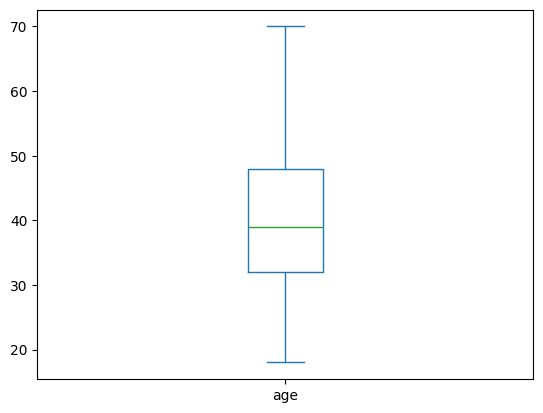

In [102]:
df['age'].plot(kind= 'box')

In [103]:
df['y'].value_counts()

y
0    34244
1     2906
Name: count, dtype: int64

In [105]:
X= df.drop(['y'],axis=1)
y = df['y']

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter

# Load dataset (replace this with your actual dataset)
# Assuming 'y' is your target column


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display class distribution
print("Original class distribution:", Counter(y_train))

# Choose a resampling strategy
# Option 1: Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_resampled))

# Option 2: Undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
print("After Undersampling:", Counter(y_resampled))

# Option 3: Combine Oversampling and Undersampling using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
print("After SMOTEENN:", Counter(y_resampled))

# Proceed with training your model


Original class distribution: Counter({0: 27398, 1: 2322})
After SMOTE: Counter({0: 27398, 1: 27398})
After Undersampling: Counter({0: 2322, 1: 2322})
After SMOTEENN: Counter({1: 24710, 0: 19471})


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.88      0.92      6846
           1       0.33      0.70      0.45       584

    accuracy                           0.86      7430
   macro avg       0.65      0.79      0.68      7430
weighted avg       0.92      0.86      0.88      7430

